In [1]:
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, Dropout, Flatten, Dense, Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [3]:
datadir= 'data'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data= pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names= columns)

In [4]:
data.head()

center  \
0  C:\Users\anura\Desktop\projects\Automatic car\...   
1  C:\Users\anura\Desktop\projects\Automatic car\...   
2  C:\Users\anura\Desktop\projects\Automatic car\...   
3  C:\Users\anura\Desktop\projects\Automatic car\...   
4  C:\Users\anura\Desktop\projects\Automatic car\...   

                                                left  \
0   C:\Users\anura\Desktop\projects\Automatic car...   
1   C:\Users\anura\Desktop\projects\Automatic car...   
2   C:\Users\anura\Desktop\projects\Automatic car...   
3   C:\Users\anura\Desktop\projects\Automatic car...   
4   C:\Users\anura\Desktop\projects\Automatic car...   

                                               right  steering  throttle  \
0   C:\Users\anura\Desktop\projects\Automatic car...       0.0       0.0   
1   C:\Users\anura\Desktop\projects\Automatic car...       0.0       0.0   
2   C:\Users\anura\Desktop\projects\Automatic car...       0.0       0.0   
3   C:\Users\anura\Desktop\projects\Automatic car...       0.0       0.0   
4   C:\Users\anura\Desktop\projects\Automatic car...       0.0       0.0   

   reverse     speed  
0        0  0.000080  
1        0  0.000078  
2        0  0.000078  
3        0  0.000078  
4        0  0.000078

In [5]:
def path_leaf(path):
    head, tail= ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2024_07_27_18_35_09_238.jpg  left_2024_07_27_18_35_09_238.jpg   
1  center_2024_07_27_18_35_09_339.jpg  left_2024_07_27_18_35_09_339.jpg   
2  center_2024_07_27_18_35_09_447.jpg  left_2024_07_27_18_35_09_447.jpg   
3  center_2024_07_27_18_35_09_548.jpg  left_2024_07_27_18_35_09_548.jpg   
4  center_2024_07_27_18_35_09_649.jpg  left_2024_07_27_18_35_09_649.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2024_07_27_18_35_09_238.jpg       0.0       0.0        0  0.000080  
1  right_2024_07_27_18_35_09_339.jpg       0.0       0.0        0  0.000078  
2  right_2024_07_27_18_35_09_447.jpg       0.0       0.0        0  0.000078  
3  right_2024_07_27_18_35_09_548.jpg       0.0       0.0        0  0.000078  
4  right_2024_07_27_18_35_09_649.jpg       0.0       0.0        0  0.000078

# Data Visualization

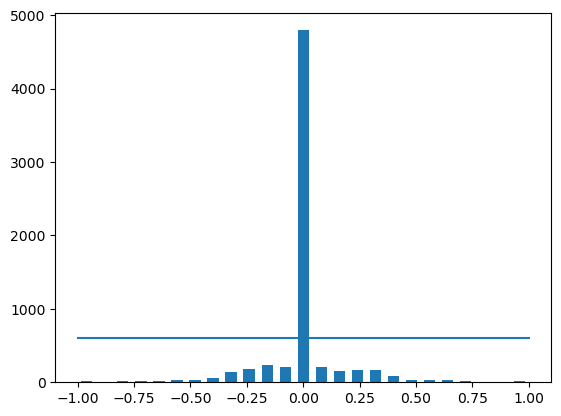

In [6]:
num_bins = 25
samples_per_bin= 600
hist, bins= np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [7]:
print('total data:', len(data))
print (data.shape)

total data: 6677
(6677, 7)


In [8]:
remove_list= []
for j in range (num_bins):
    list_=[]
    for i in  range (len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_= shuffle(list_)
    list_= list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed: ', len(remove_list))
data.drop(data.index[remove_list], inplace= True)
print('remaining: ', len(data))

removed:  4195
remaining:  2482


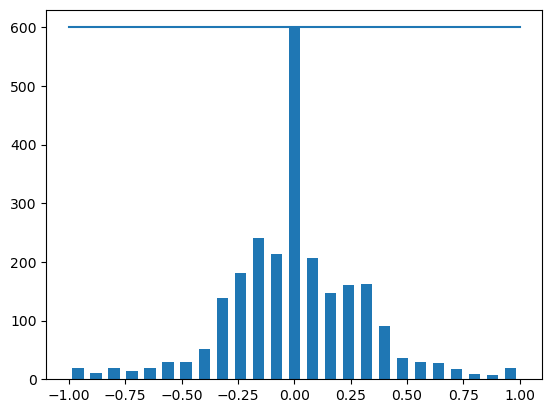

In [9]:
hist, _= np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [10]:
def load_img_steering(datadir, df):
    image_path= []
    steering = []
    for i in range (len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        #center image append
        image_path.append(os.path. join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
        #right image append
        image_path.append(os.path.join(datadir, right.strip()))
        steering.append(float(indexed_data[3])+0.15)
        #left image append
        image_path.append(os.path.join(datadir, left.strip()))
        steering.append(float(indexed_data[3])-0.15)
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

In [11]:
image_paths, steerings= load_img_steering(datadir + '/IMG', data)

C:\Users\anura\AppData\Local\Temp\ipykernel_23448\819740033.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
C:\Users\anura\AppData\Local\Temp\ipykernel_23448\819740033.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))
C:\Users\anura\AppData\Local\Temp\ipykernel_23448\819740033.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [12]:
image_paths, len(image_paths)

(array(['data/IMG\\center_2024_07_27_18_35_09_238.jpg',
        'data/IMG\\right_2024_07_27_18_35_09_238.jpg',
        'data/IMG\\left_2024_07_27_18_35_09_238.jpg', ...,
        'data/IMG\\center_2024_07_27_18_50_09_878.jpg',
        'data/IMG\\right_2024_07_27_18_50_09_878.jpg',
        'data/IMG\\left_2024_07_27_18_50_09_878.jpg'], dtype='<U43'),
 7446)

In [13]:
steerings, len(steerings)

(array([ 0.  ,  0.15, -0.15, ...,  0.  ,  0.15, -0.15]), 7446)

# Spliting training set and validation set

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples:{}\nValid Samples:{}'.format(len(X_train), len(X_valid)))

Training Samples:5956
Valid Samples:1490


Text(0.5, 1.0, 'Validation Set')

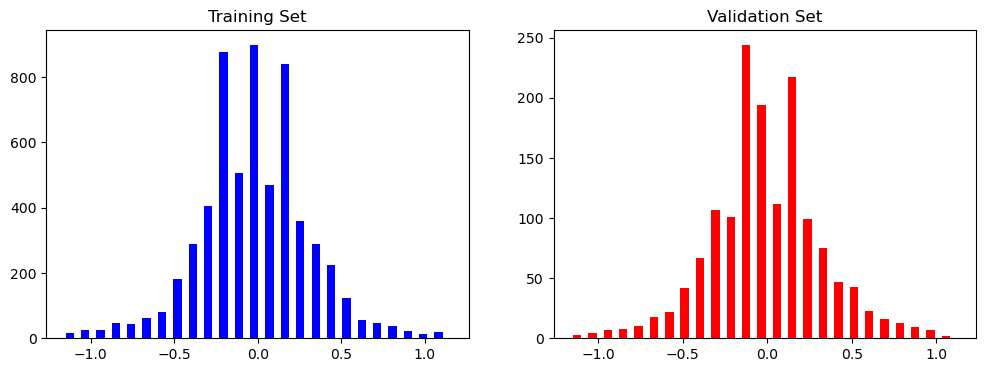

In [15]:
fig, axes = plt.subplots(1,2,figsize= (12,4))
axes[0].hist(y_train, bins= num_bins, width= 0.05, color=  'blue')
axes[0].set_title('Training Set')
axes[1].hist(y_valid, bins= num_bins, width= 0.05, color= 'red')
axes[1].set_title('Validation Set')

# Data Augmentation

In [16]:
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image
    
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

Text(0.5, 1.0, 'Zoomed Image')

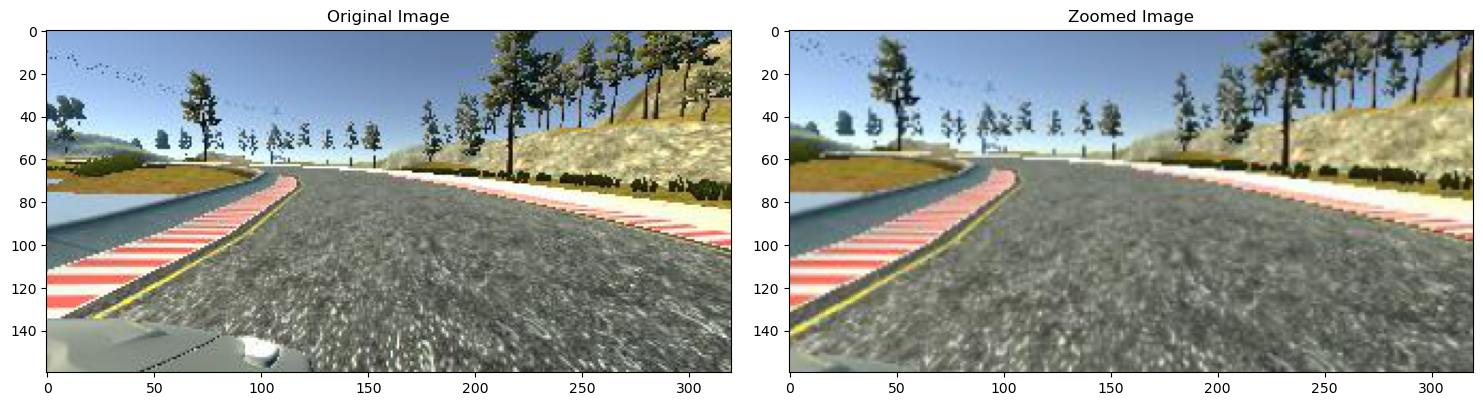

In [17]:
fig, axs= plt.subplots(1,2,figsize= (15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [18]:
def pan(image):
    pan= iaa.Affine(translate_percent={"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
    image =pan.augment_image(image)
    return image

Text(0.5, 1.0, 'Panned Image')

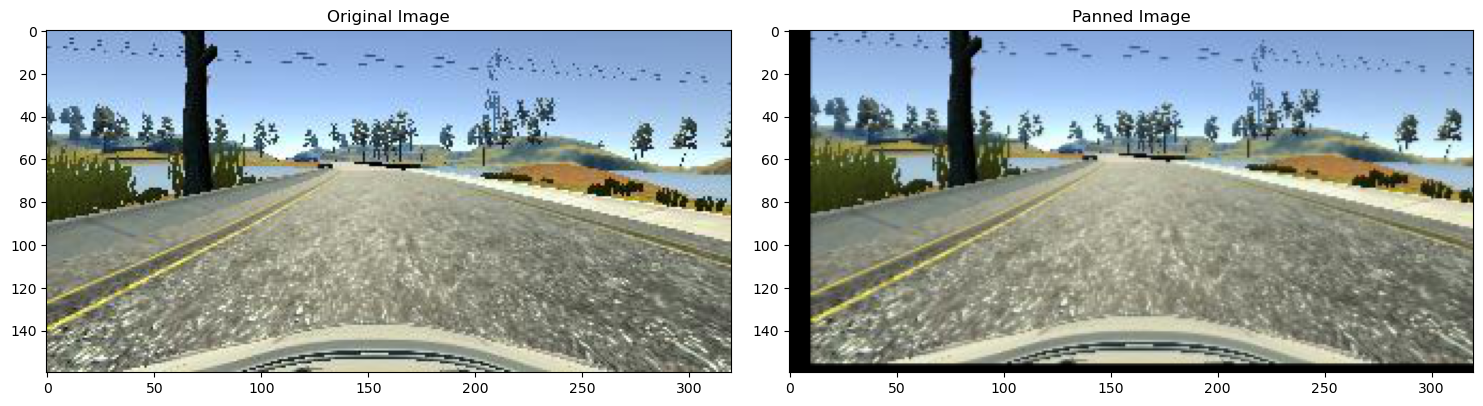

In [19]:
image = image_paths[random.randint(0, 1000)]
original_image= mpimg.imread(image)
panned_image = pan(original_image)

fig, axs= plt.subplots(1,2,figsize= (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

Text(0.5, 1.0, 'Brightness Altered Image')

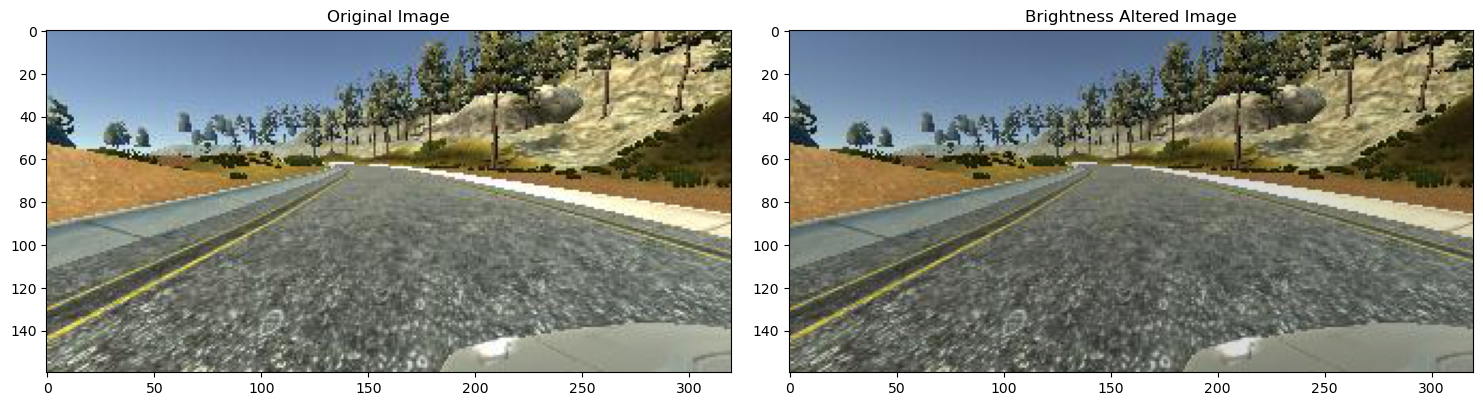

In [20]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

image= image_paths[random.randint(0, 1000)]
original_image= mpimg.imread(image)
brightness_altered_image = img_random_brightness (original_image)

fig, axs= plt.subplots(1,2,figsize= (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness Altered Image')

Text(0.5, 1.0, 'Flipped Image- Steering Angle: 0.1835457')

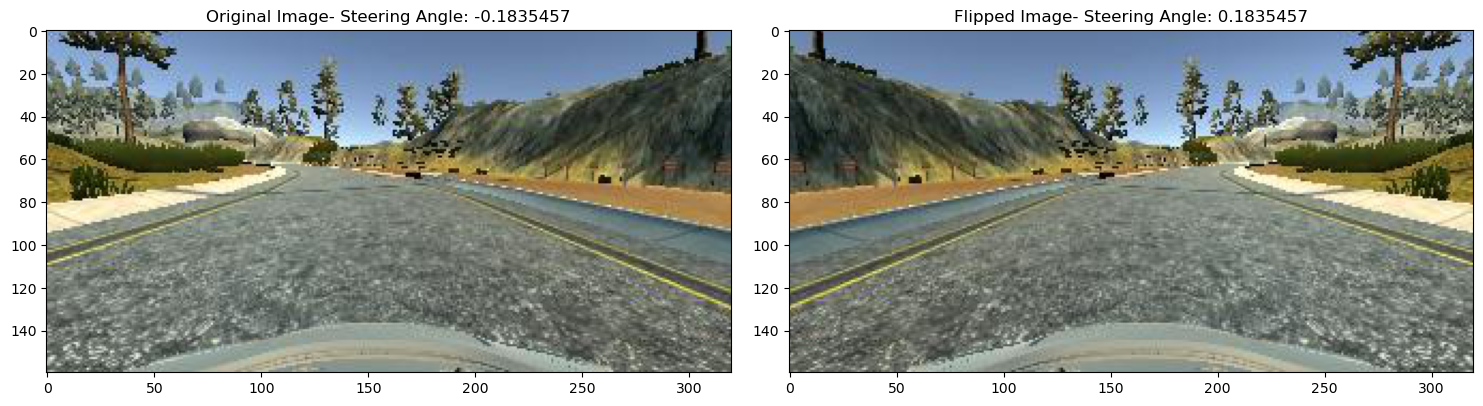

In [21]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image= mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs= plt.subplots(1,2,figsize= (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image- ' + 'Steering Angle: '+ str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image- '+ 'Steering Angle: ' + str(flipped_steering_angle))

In [22]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand()<0.5:
        image= zoom(image)
    if np.random.rand()< 0.5:
        image= img_random_brightness(image)
    if np.random.rand()<0.5:
        image, steering_angle = img_random_flip(image, steering_angle)
    return image, steering_angle

Text(0.5, 1.0, 'Augmented Image')

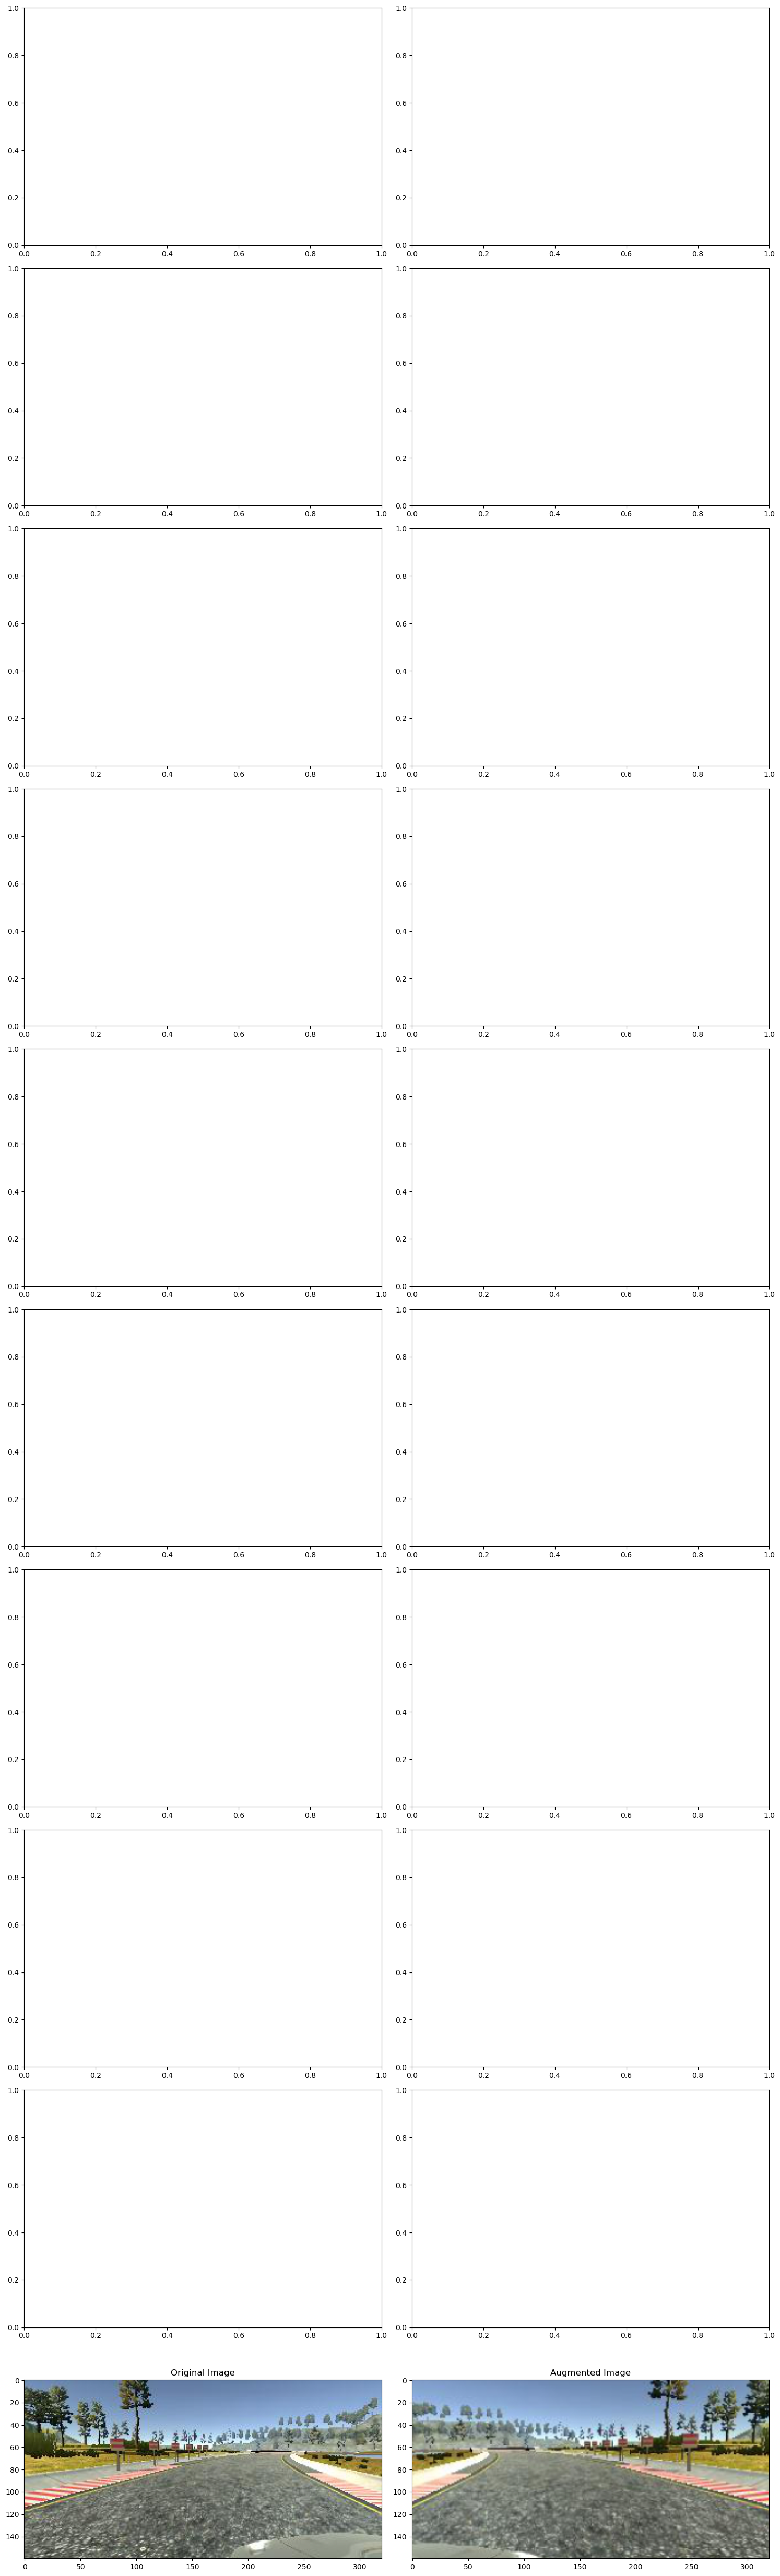

In [23]:
ncol= 2
nrow= 10

fig, axs = plt.subplots(nrow, ncol, figsize = (15, 50))
fig.tight_layout()

for i in range(10):
    randnum= random.randint(0, len(image_paths)-1)
    random_image = image_paths[randnum]
    random_steering = steerings[randnum]

    #original_image = mpimg.imread(random_image)
    augmented_image, steering = random_augment(random_image, random_steering)

axs[i][0].imshow(mpimg.imread(random_image))
axs[i][0].set_title("Original Image")

axs[i][1].imshow(augmented_image)
axs[i][1].set_title("Augmented Image")

# Image Preprocessing

In [24]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3,3),0)
    img = cv2.resize(img, (200, 66))
    img= img/255
    return img

Text(0.5, 1.0, 'Preprocessed Iamge')

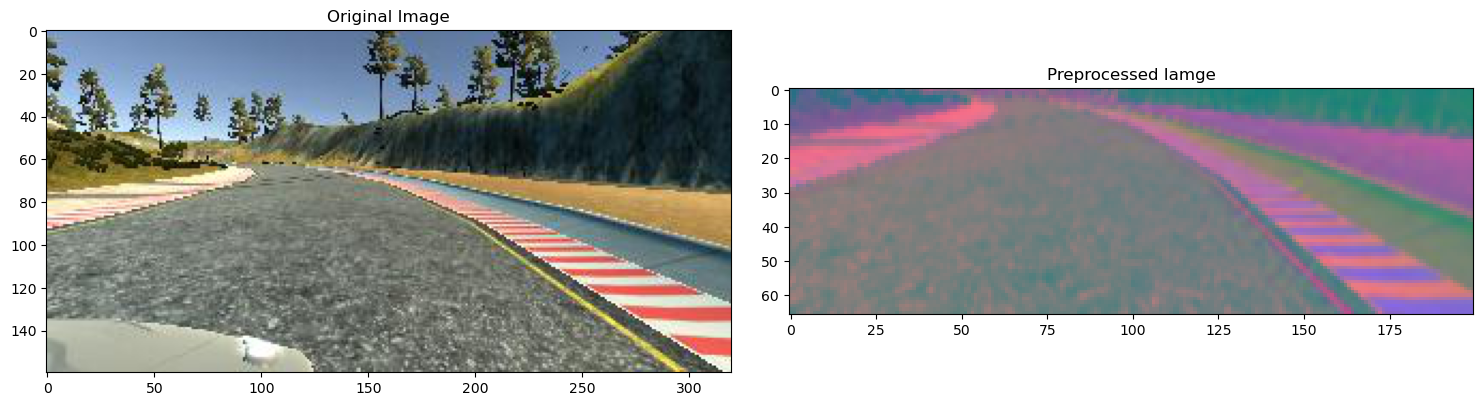

In [25]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1,2, figsize= (15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Iamge')                 

In [30]:
!nvidia-smi

Sun Jul 28 19:18:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.26                 Driver Version: 546.26       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8               3W /  50W |    141MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [26]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):

    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths)-1)
            
            if istraining:
                im, steering = random_augment(image_paths[random_index], steering_ang[random_index])

            else:
                im = mpimg.imread(image_paths[random_index])
                steering =steering_ang[random_index]

            im = img_preprocess(im)
            batch_img.append(im)
            batch_steering.append(steering)
          

        yield (np.asarray(batch_img), np.asarray(batch_steering))

In [27]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

Text(0.5, 1.0, 'Validation Image')

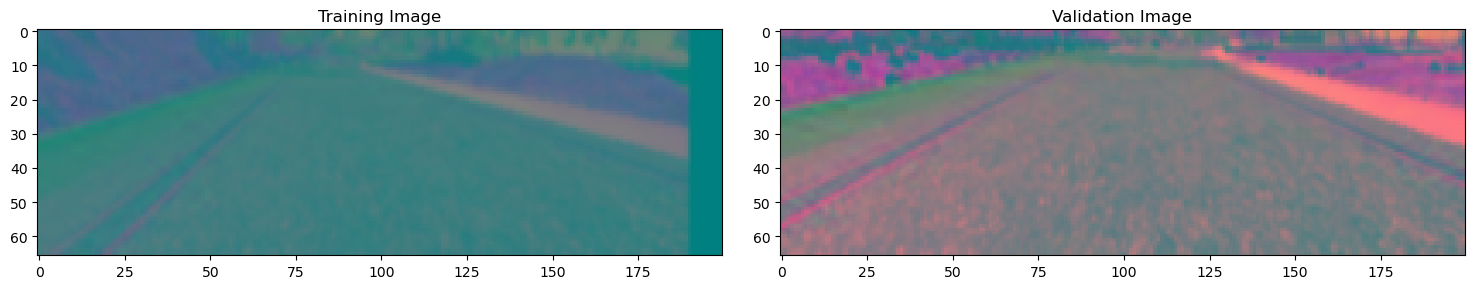

In [28]:
fig, axs = plt.subplots(1,2,figsize =( 15,10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [32]:
  def nvidia_model():
      model= Sequential()
      model.add(Conv2D(24,(5,5), strides= (2,2), input_shape= (66,200,3), activation= 'elu'))
      model.add(Conv2D(36,(5,5), strides= (2,2), activation= 'elu'))
      model.add(Conv2D(48,(5,5), strides= (2,2), activation= 'elu'))
      model.add(Conv2D(64,(5,5), activation= 'elu'))
      
      model.add(Flatten())
      model.add(Dense(100, activation= 'elu'))
      #model.add(Dropout(0.5))
      
      model.add(Dense(50, activation= 'elu'))
      #model.add(Dropout(0.5))
      
      model.add(Dense(10, activation= 'elu'))
      #model.add(Dropout(0.5))
      
      model.add(Dense(1))
      optimizer = tf.keras.optimizers.Adam(learning_rate=  1e-3)
      model.compile(loss='mse', optimizer= optimizer)
      return model

In [33]:
model= nvidia_model()
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 1, 18, 64)      │        76,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,443 (1.01 MB)

 Trainable params: 264,443 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

None


In [34]:
history = model.fit(batch_generator(X_train, y_train, 100,1 ), steps_per_epoch= 300, epochs=15, validation_data= batch_generator(X_valid, y_valid, 100, 0), validation_steps= 200, verbose=1, shuffle= 1)

Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 152s 498ms/step - loss: 0.2191 - val_loss: 0.0705
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 126s 422ms/step - loss: 0.0811 - val_loss: 0.0668
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 125s 419ms/step - loss: 0.0730 - val_loss: 0.0644
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 124s 416ms/step - loss: 0.0722 - val_loss: 0.0642
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 122s 409ms/step - loss: 0.0702 - val_loss: 0.0542
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 121s 405ms/step - loss: 0.0660 - val_loss: 0.0552
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 120s 402ms/step - loss: 0.0654 - val_loss: 0.0555
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 120s 402ms/step - loss: 0.0635 - val_loss: 0.0625
Epoch 9/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 120s 400ms/step - loss: 0.0641 - val_loss: 0.0564
Epoch 10/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 121s 404ms/step - loss: 0.0624 - val_loss: 0.0578
Epoch 11/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 120s 401ms/step - loss: 0.0631 - val_loss: 0.0567
Epoch 12

Text(0.5, 0, 'Epoch')

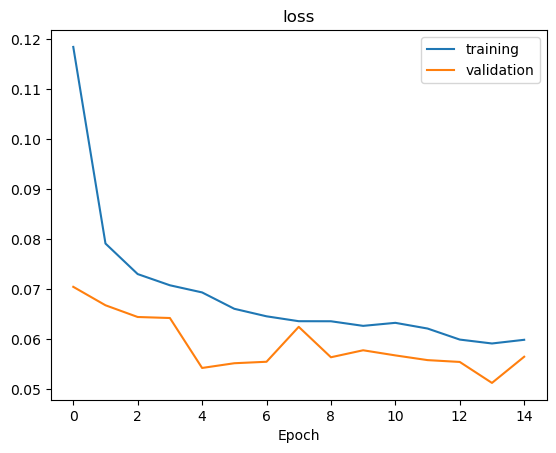

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('Epoch')

In [36]:
model.save('my_model.h5')